In [ ]:
#importing libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv(r"C:\Users\Disha\Capstone Project\index dataset.csv")
df.head()

# Define the target variable 'y'
y = df['Federal Funds Target Rate']

In [ ]:
# Convert the data type of a specific column from float32 to float64
df['Federal Funds Target Rate'] = df['Federal Funds Target Rate'].astype('float64')
df['Federal Funds Upper Target'] = df['Federal Funds Upper Target'].astype('float64')
df['Federal Funds Lower Target'] = df['Federal Funds Lower Target'].astype('float64')
df['Effective Federal Funds Rate'] = df['Effective Federal Funds Rate'].astype('float64')
df['Real GDP (Percent Change)'] = df['Real GDP (Percent Change)'].astype('float64')
df['Unemployment Rate'] = df['Unemployment Rate'].astype('float64')
df['Inflation Rate'] = df['Inflation Rate'].astype('float64')

# Save the converted dataframe to a new csv file
df.to_csv('converted_dataset.csv', index=False)

In [ ]:
# Get the number of rows and columns
num_rows, num_columns = df.shape

# Print the number of rows and columns
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 964
Number of columns: 10


In [ ]:
# Check for missing values in each column
missing_data = df.isnull().sum()

# Print the number of missing values for each column
print(missing_data)

Year                              0
Month                             0
Day                               0
Federal Funds Target Rate       339
Federal Funds Upper Target      499
Federal Funds Lower Target      499
Effective Federal Funds Rate     73
Real GDP (Percent Change)       357
Unemployment Rate                73
Inflation Rate                  115
dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)


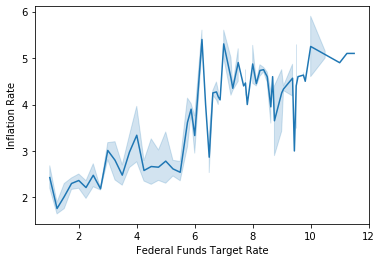

In [ ]:
print(sns.lineplot(x=df['Federal Funds Target Rate'],y=df['Inflation Rate']))

AxesSubplot(0.125,0.125;0.775x0.755)


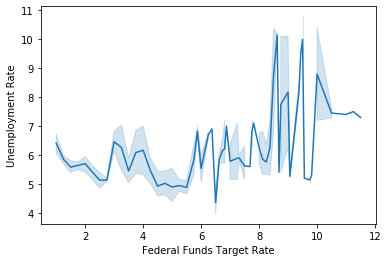

In [ ]:
print(sns.lineplot(x=df['Federal Funds Target Rate'],y=df['Unemployment Rate']))

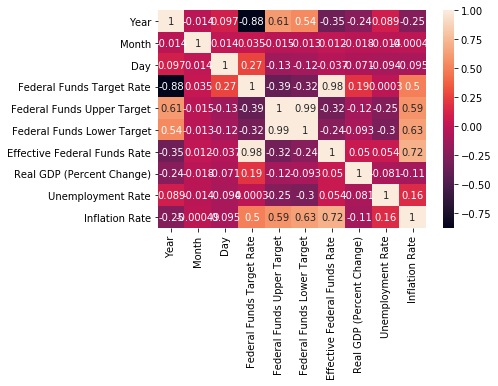

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
# Check which columns contain categorical data
categorical_columns = df.select_dtypes(include=['object']).columns

# Print the columns that contain categorical data
print("Categorical columns:", categorical_columns)

Categorical columns: Index([], dtype='object')


In [ ]:
df=df.drop(['Month','Day'],axis=1)
df

,Year,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,1954,NaN,NaN,NaN,0.80,4.600000,5.8,NaN
1,1954,NaN,NaN,NaN,1.22,NaN,6.0,NaN
2,1954,NaN,NaN,NaN,1.06,NaN,6.1,NaN
3,1954,NaN,NaN,NaN,0.85,8.000000,5.7,NaN
4,1954,NaN,NaN,NaN,0.83,NaN,5.3,NaN
...,...,...,...,...,...,...,...,...
959,2022,1.0,4.5,4.25,2.33,0.330000,3.5,6.5
960,2022,1.0,4.5,4.25,2.56,3.200000,3.7,6.5
961,2022,1.0,4.5,4.25,3.08,0.330000,3.7,6.5
962,2022,1.0,4.5,4.25,3.78,0.330000,3.6,6.5


In [ ]:
df = df[df['Year'] >= 1990]
df

,Year,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
499,1990,8.25,0.0,0.00,8.23,4.500000,5.4,4.4
500,1990,8.25,0.0,0.00,8.24,0.700000,5.3,4.6
501,1990,8.25,0.0,0.00,8.28,0.700000,5.2,4.9
502,1990,8.25,0.0,0.00,8.26,1.600000,5.4,4.8
503,1990,8.25,0.0,0.00,8.18,0.700000,5.4,4.8
...,...,...,...,...,...,...,...,...
959,2022,1.00,4.5,4.25,2.33,0.330000,3.5,6.5
960,2022,1.00,4.5,4.25,2.56,3.200000,3.7,6.5
961,2022,1.00,4.5,4.25,3.08,0.330000,3.7,6.5
962,2022,1.00,4.5,4.25,3.78,0.330000,3.6,6.5


In [ ]:
# Check for missing values in each column
missing_data = df.isnull().sum()

# Print the number of missing values for each column
print(missing_data)

Year                            0
Federal Funds Target Rate       0
Federal Funds Upper Target      0
Federal Funds Lower Target      0
Effective Federal Funds Rate    0
Real GDP (Percent Change)       0
Unemployment Rate               0
Inflation Rate                  0
dtype: int64


In [ ]:
# Create the scaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
data_scaled = scaler.fit_transform(df)

# Put the normalized data back into a DataFrame
df = pd.DataFrame(data_scaled, columns=df.columns)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (Train dataset = 80% & Test dataset = 20%)
X_train, X_test, y_train, y_test = train_test_split(df.drop('Federal Funds Target Rate', axis=1), df["Federal Funds Target Rate"], test_size=0.2, random_state=0)

# Split the training data into training and validation sets (Validation dataset = 25% of the train dataset)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

In [ ]:
# Fitting Random Forest Regressor to the training set  
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Create a Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model using the training data
regressor.fit(X_train, y_train)

# Use the fitted model to make predictions on the test data
y_pred1 = regressor.predict(X_test)

r2_score(y_test,y_pred1)

0.9559180959479847

In [ ]:
# Gradient Boost
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the gradient boost regressor
gb = GradientBoostingRegressor()

# Fit the regressor to the training data
gb.fit(X_train, y_train)

# Make predictions on the test data
y_pred2 = gb.predict(X_test)

r2_score(y_test,y_pred2)

0.9657977255208872

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression

# Initialize the gradient boost regressor
lin=LinearRegression()

# Fit the regressor to the training data
lin.fit(X_train,y_train)

# Make predictions on the test data
y_pred3=lin.predict(X_test)

r2_score(y_test,y_pred3)

0.9370833031074

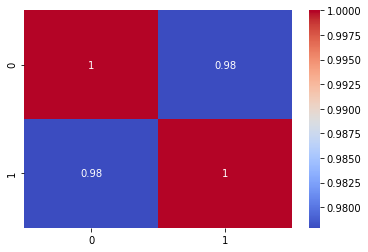

In [ ]:
# assuming y_pred and y_actual are numpy arrays containing predicted and actual values
corr_matrix = np.corrcoef(y_pred1, y_test)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

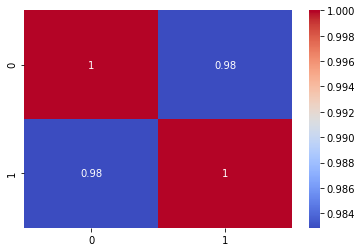

In [ ]:
# assuming y_pred and y_actual are numpy arrays containing predicted and actual values
corr_matrix = np.corrcoef(y_pred2, y_test)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

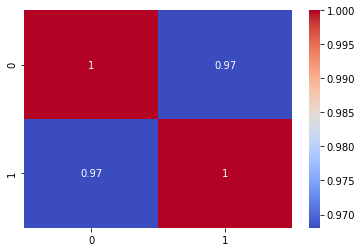

In [ ]:
# assuming y_pred and y_actual are numpy arrays containing predicted and actual values
corr_matrix = np.corrcoef(y_pred3, y_test)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

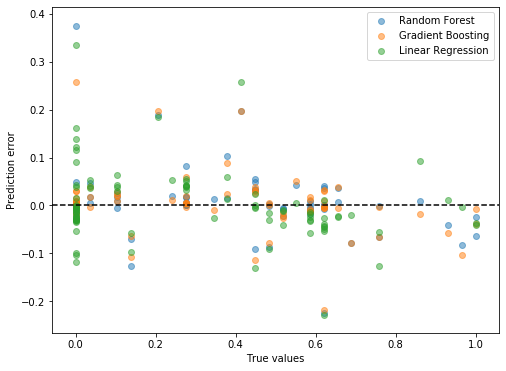

In [ ]:
# Prediction Error Plot
# Used to visualize the differences between the predicted and actual values for a machine learning model.

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Calculate the prediction errors for each model
rf_errors = y_pred1 - y_test
gb_errors = y_pred2 - y_test
lr_errors = y_pred3 - y_test

# Plot the prediction errors
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_errors, alpha=0.5, label='Random Forest')
plt.scatter(y_test, gb_errors, alpha=0.5, label='Gradient Boosting')
plt.scatter(y_test, lr_errors, alpha=0.5, label='Linear Regression')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('True values')
plt.ylabel('Prediction error')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error
# the average of the absolute differences between the predicted and actual values.

# Calculate MAE for random forest regressor model
rf_mae = mean_absolute_error(y_test, y_pred1)

# Calculate MAE for gradient boost model
gb_mae = mean_absolute_error(y_test, y_pred2)

# Calculate MAE for linear regression model
lr_mae = mean_absolute_error(y_test, y_pred3)

print(f"Random Forest Regressor MAE: {rf_mae}")
print(f"Gradient Boosting MAE: {gb_mae}")
print(f"Linear Regression MAE: {lr_mae}")

Random Forest Regressor MAE: 0.02828435087139206
Gradient Boosting MAE: 0.028055224967208647
Linear Regression MAE: 0.04998024304592976


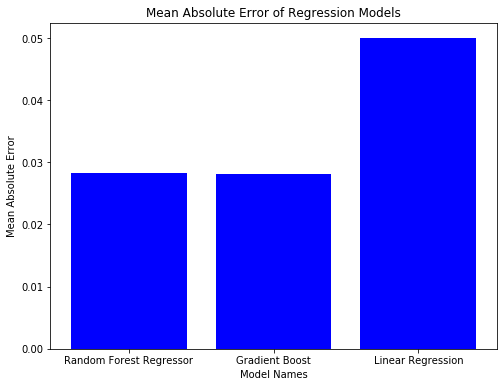

In [ ]:
import matplotlib.pyplot as plt

# Define model names and their MAE values
model_names = ['Random Forest Regressor', 'Gradient Boost', 'Linear Regression']
mae_values = [0.02828435087139206,  0.028055224967208647, 0.04998024304592976]

# Customize the plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(model_names, mae_values, color='blue')
ax.set_title('Mean Absolute Error of Regression Models')
ax.set_xlabel('Model Names')
ax.set_ylabel('Mean Absolute Error')

# Display the plot
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate MSE: average of the squared differences between the predicted and actual values.
rf_mse = mean_squared_error(y_test, y_pred1)
gb_mse = mean_squared_error(y_test, y_pred2)
lr_mse = mean_squared_error(y_test, y_pred3)

print("Random Forest MSE:", rf_mse)
print("Gradient Boosting MSE:", gb_mse)
print("Linear Regression MSE:", lr_mse)

Random Forest MSE: 0.003933598127616712
Gradient Boosting MSE: 0.0030520007187647895
Linear Regression MSE: 0.005614299255325503


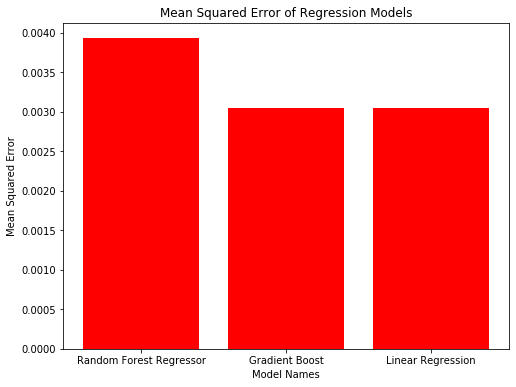

In [ ]:
import matplotlib.pyplot as plt

# Define model names and their MSE values
model_names = ['Random Forest Regressor', 'Gradient Boost', 'Linear Regression']
mse_values = [ 0.003933598127616712, 0.0030520007187647895, 0.0030520007187647895]

# Customize the plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(model_names, mse_values, color='Red')
ax.set_title('Mean Squared Error of Regression Models')
ax.set_xlabel('Model Names')
ax.set_ylabel('Mean Squared Error')

# Display the plot
plt.show()